In [1]:
from model.ctabgan import CTABGAN
from model.eval.evaluation import get_utility_metrics,stat_sim,privacy_metrics
import numpy as np
import pandas as pd
import glob

In [2]:
num_exp = 1


In [ ]:
dataset = "king"
dataset = "cover"
#real_path = "../CTAB-GAN-main/Real_Datasets/train2.csv"
#real_path = "../CTGAN-main/Processed_Titanic_Data.csv"
#real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
real_path = "../CTAB-GAN-main/Real_Datasets/Credit.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/creditcard2.csv"
fake_file_root = "Fake_Datasets"

In [3]:
#df = pd.read_csv("Real_Datasets/king.csv")
df = pd.read_csv(real_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geography_Germany  5000 non-null   float64
 1   Geography_Spain    5000 non-null   float64
 2   Gender_Male        5000 non-null   float64
 3   CreditScore        5000 non-null   float64
 4   Age                5000 non-null   float64
 5   Tenure             5000 non-null   float64
 6   Balance            5000 non-null   float64
 7   NumOfProducts      5000 non-null   float64
 8   HasCrCard          5000 non-null   float64
 9   IsActiveMember     5000 non-null   float64
 10  EstimatedSalary    5000 non-null   float64
 11  Exited             5000 non-null   float64
dtypes: float64(12)
memory usage: 468.9 KB


In [4]:
df = pd.read_csv("Real_Datasets/king.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
# real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
# synthesizer =  CTABGAN(raw_csv_path = real_path,
#                  test_ratio = 0.20,
#                  categorical_columns = ['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked_Q','Embarked_S','Survived'],   
#                  log_columns = [],
#                  mixed_columns= {},
#                  general_columns= ["Age", "Fare"],
#                  non_categorical_columns= [],
#                  integer_columns = [],
#                  problem_type= {"Classification": "Survived"}) 
# real_path = "../CTAB-GAN-main/Real_Datasets/Adult3.csv"
# synthesizer =  CTABGAN(raw_csv_path = real_path,
#                  test_ratio = 0.20,
#                  categorical_columns = [ 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'],
#                  log_columns = [],
#                  mixed_columns= {'capital-loss':[0.0],'capital-gain':[0.0]},
#                  general_columns= ['age', 'fnlwgt','capital-gain', 'capital-loss','hours-per-week'],
#                  non_categorical_columns= [],
#                  integer_columns = [],
#                  problem_type= {"Classification": 'income'})
real_path = "G:/DataSets/Churn.csv"
synthesizer =  CTABGAN(raw_csv_path = real_path,
                 test_ratio = 0.20,
                 categorical_columns = [
                'Geography_Germany', 
                'Geography_Spain',
                'Gender_Male',
                'HasCrCard',
                'IsActiveMember'
                ],  
                 log_columns = [],
                 mixed_columns= {},
                 general_columns= [
                'CreditScore',     
                'Age',  
                'Tenure',    
                'NumOfProducts',
                'EstimatedSalary'
                ],
                 non_categorical_columns= [],
                 integer_columns = [],
                 problem_type= {"Classification": "Exited"}) 
for i in range(num_exp):
    synthesizer.fit()

100%|██████████| 200/200 [06:21<00:00,  1.91s/it]

Finished training in 382.0451374053955  seconds.


In [8]:
for i in range(3):
    syn = synthesizer.generate_samples()
    syn.to_csv(f"G:/DataSets/Fake_Dataset/Synthcity-CTABGANplus-churn200_{i}.csv", index= False)

In [ ]:
import pandas as pd
real_path = "G:/DataSets/Credit150k.csv"
# real_path = "../CTAB-GAN-main/Real_Datasets/CreditLong10000.csv"
df = pd.read_csv(real_path) 

column_names = df.columns.tolist()

print(column_names)


['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
import pandas as pd
#real_path = "../CTAB-GAN-main/Real_Datasets/train2.csv"
real_path = "../synthcity-main/tutorials/covertype_preprocessed.csv"
#real_path = 'G:\DataSets\Covertype30k.csv'
df = pd.read_csv(real_path)

columns = df.columns.tolist()

list1 = columns[:10]

list2 = columns[10:]

print(list1)
print(list2)

In [7]:
synthesizer =  CTABGAN(raw_csv_path = real_path,
                 test_ratio = 0.20,
                 categorical_columns =list2,
                 log_columns = [],
                 mixed_columns= {},
                 general_columns= list1,
                 non_categorical_columns= [],
                 integer_columns = [],
                 problem_type= {"Classification": 'Cover_Type'}) 

for i in range(num_exp):
    synthesizer.fit()

100%|██████████| 200/200 [02:52<00:00,  1.16it/s]

Finished training in 172.9716296195984  seconds.


In [7]:
for i in range(3):
    syn = synthesizer.generate_samples()
    syn.to_csv(f"G:/DataSets/Fake_Dataset/CTABGAN-usedcredit{i}.csv", index= False)

In [ ]:
#real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
#real_path = "../CTAB-GAN-main/Real_Datasets/Adult3.csv"
real_path = "../CTAB-GAN-main/Real_Datasets/Credit.csv"
fake_path = "../synthcity-main/tutorials/ETransCTGAN-Cre_1.csv"
#fake_path = "../synthcity-main/tutorials/TVAE-Adu_5.csv"
real_data = pd.read_csv(real_path).to_numpy()
generated_data = pd.read_csv(fake_path).to_numpy()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
real_data_scaled = scaler.fit_transform(real_data)
generated_data_scaled = scaler.transform(generated_data)


pca = PCA(n_components=0.95)  
real_data_pca = pca.fit_transform(real_data_scaled)
generated_data_pca = pca.transform(generated_data_scaled)
def get_adaptive_bins(data1, data2, n_bins=5):

    combined_data = np.vstack([data1, data2])
    min_vals = np.min(combined_data, axis=0)
    max_vals = np.max(combined_data, axis=0)
    return [np.linspace(min_, max_, n_bins+1) for min_, max_ in zip(min_vals, max_vals)]


bins = get_adaptive_bins(real_data_pca, generated_data_pca, n_bins=5)

def compute_jsd(real_data, generated_data):
    real_hist, _ = np.histogramdd(real_data, bins=bins, range=[[-5, 5]] * real_data.shape[1])
    generated_hist, _ = np.histogramdd(generated_data, bins=5, range=[[-5, 5]] * generated_data.shape[1])
    real_hist = real_hist / np.sum(real_hist)
    generated_hist = generated_hist / np.sum(generated_hist)
    return 0.5 * (entropy(real_hist.flatten(), 0.5*(real_hist+generated_hist).flatten()) 
                + entropy(generated_hist.flatten(), 0.5*(real_hist+generated_hist).flatten()))


def kl_divergence(p, q, epsilon=1e-10):

    p = p + epsilon
    q = q + epsilon
    p = p / np.sum(p)
    q = q / np.sum(q)
    return entropy(p, q)

def compute_kl(real_data, generated_data):

    bins = 10
    real_hist, _ = np.histogramdd(real_data, bins=bins, range=[[-5, 5]] * real_data.shape[1])
    generated_hist, _ = np.histogramdd(generated_data, bins=bins, range=[[-5, 5]] * generated_data.shape[1])
    real_hist = real_hist / np.sum(real_hist)
    generated_hist = generated_hist / np.sum(generated_hist)
    return kl_divergence(real_hist.flatten(), generated_hist.flatten())

def compute_wd(real_data, generated_data):
    return np.mean(cdist(real_data, generated_data, metric='euclidean'))

jsd_value = compute_jsd(real_data_pca, generated_data_pca)
kl_value = compute_kl(real_data_pca, generated_data_pca)
wd_value = compute_wd(real_data, generated_data)

print(f"Jensen-Shannon Divergence (JSD): {jsd_value}")
print(f"Kullback-Leibler Divergence (KL): {kl_value}")
print(f"Wasserstein Distance (WD): {wd_value}")


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
from scipy.spatial.distance import cdist

def kl_divergence(p, q):

    epsilon = 1e-10
    p = np.clip(p, epsilon, 1)
    q = np.clip(q, epsilon, 1)
    return np.sum(p * np.log(p / q))

def js_divergence(p, q):

    m = 0.5 * (p + q)
    return 0.5 * (kl_divergence(p, m) + kl_divergence(q, m))

def wasserstein_distance(p, q):

    return np.sum(np.abs(np.cumsum(p) - np.cumsum(q)))

def handle_missing_data(data):
    return data.dropna()

def handle_zero_variance_columns(data):
    return data.loc[:, data.var() > 0]

def calculate_metrics(real_data, generated_data):
    real_data = handle_missing_data(real_data)
    generated_data = handle_missing_data(generated_data)
    
    real_data = handle_zero_variance_columns(real_data)
    generated_data = handle_zero_variance_columns(generated_data)

    real_data = (real_data - real_data.mean(axis=0)) / real_data.std(axis=0)
    generated_data = (generated_data - generated_data.mean(axis=0)) / generated_data.std(axis=0)

    if real_data.isnull().any().any() or generated_data.isnull().any().any():
        print("Warning: There are still NaN values after handling!")
        return None, None, None
    
    real_hist = np.histogram(real_data, bins=30, density=True)[0]
    generated_hist = np.histogram(generated_data, bins=30, density=True)[0]

    kl = kl_divergence(real_hist, generated_hist)
    
    jsd = js_divergence(real_hist, generated_hist)

    wasserstein = wasserstein_distance(real_hist, generated_hist)

    return kl, jsd, wasserstein

def load_data(path):
    return pd.read_csv(path)
#real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
#real_path = "../CTAB-GAN-main/Real_Datasets/Adult3.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/Credit.csv"
real_path = "../synthcity-main/tutorials/covertype_preprocessed.csv"
fake_path = "../synthcity-main/tutorials/DDPM-cover-5.csv"
#fake_path = "../synthcity-main/tutorials/TVAE-Adu_5.csv"

real_data = load_data(real_path)
generated_data = load_data(fake_path)

kl, jsd, wasserstein = calculate_metrics(real_data, generated_data)

if kl is not None and jsd is not None and wasserstein is not None:
    print(f"KL Divergence: {kl}")
    print(f"Jensen-Shannon Divergence: {jsd}")
    print(f"Wasserstein Distance: {wasserstein}")
else:
    print("can't calculate")



KL Divergence: 12.813512897168671
Jensen-Shannon Divergence: 0.4269477241529317
Wasserstein Distance: 3.5541478874176113


In [5]:
fake_paths = glob.glob(fake_file_root+"/"+dataset+"/"+"*")

In [6]:
model_dict =  {"Regression":["l_reg","ridge","lasso","B_ridge"]}
result_mat = get_utility_metrics(real_path,fake_paths,"MinMax",model_dict, test_ratio = 0.20)

result_df  = pd.DataFrame(result_mat,columns=["Mean_Absolute_Percentage_Error","Explained_Varaince_Score","R2_Score"])
result_df.index = list(model_dict.values())[0]
result_df

,Mean_Absolute_Percentage_Error,Explained_Varaince_Score,R2_Score
l_reg,-0.005845,0.015227,0.017695
ridge,-0.006274,0.015830,0.018309
lasso,-0.005648,0.015212,0.017693
B_ridge,-0.005659,0.015380,0.017861


In [7]:
# ctabplus
insurance_categorical = ['bedrooms', "floors", 'waterfront', 'view', 'condition', 'grade','zipcode']
stat_res_avg = []
for fake_path in fake_paths:
    stat_res = stat_sim(real_path,fake_path,insurance_categorical)
    stat_res_avg.append(stat_res)

stat_columns = ["Average WD (Continuous Columns","Average JSD (Categorical Columns)","Correlation Distance"]
stat_results = pd.DataFrame(np.array(stat_res_avg).mean(axis=0).reshape(1,3),columns=stat_columns)
stat_results

column:  date WD:  0.019347079334856045
column:  bedrooms JSD:  0.07545224171591479
column:  bathrooms WD:  0.015482260187733528
column:  sqft_living WD:  0.0013708751673394861
column:  sqft_lot WD:  0.0012582241467157895
column:  floors JSD:  0.05183151293185271
column:  waterfront JSD:  0.006157371780194705
column:  view JSD:  0.028772552742964082
column:  condition JSD:  0.05165011431208447
column:  grade JSD:  0.06367823034368313
column:  sqft_above WD:  0.008201782305157694
column:  sqft_basement WD:  0.007427372133854311
column:  yr_built WD:  0.012819720447725282
column:  yr_renovated WD:  0.008029970856177746
column:  zipcode JSD:  0.13754788052999803
column:  lat WD:  0.012536469186935848
column:  long WD:  0.011440810334641883
column:  sqft_living15 WD:  0.010480395646293862
column:  sqft_lot15 WD:  0.0032856315864392897
column:  price WD:  0.012365693691693977
column:  date WD:  0.022376402241170868
column:  bedrooms JSD:  0.07327774450167826
column:  bathrooms WD:  0.015447

,Average WD (Continuous Columns,Average JSD (Categorical Columns),Correlation Distance
0,0.009519,0.060275,1.012279


In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

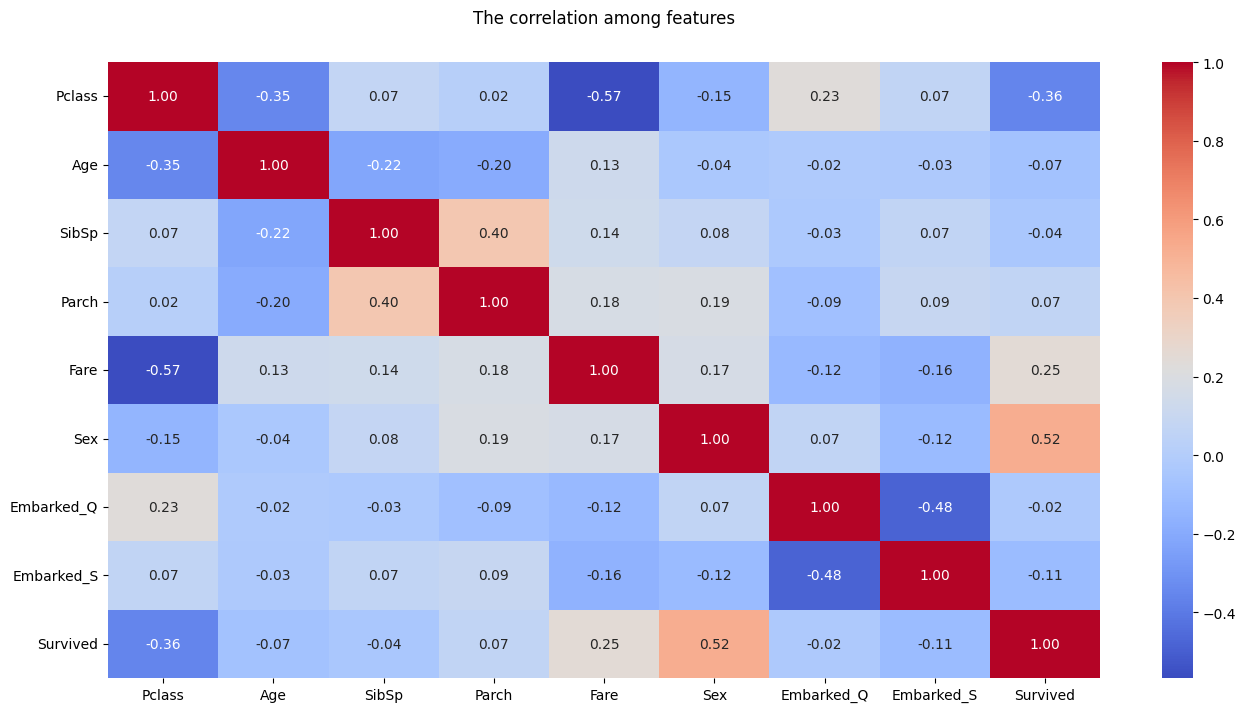

In [ ]:
df = pd.read_csv( "../CTGAN-main/Processed_Titanic_Data.csv")
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

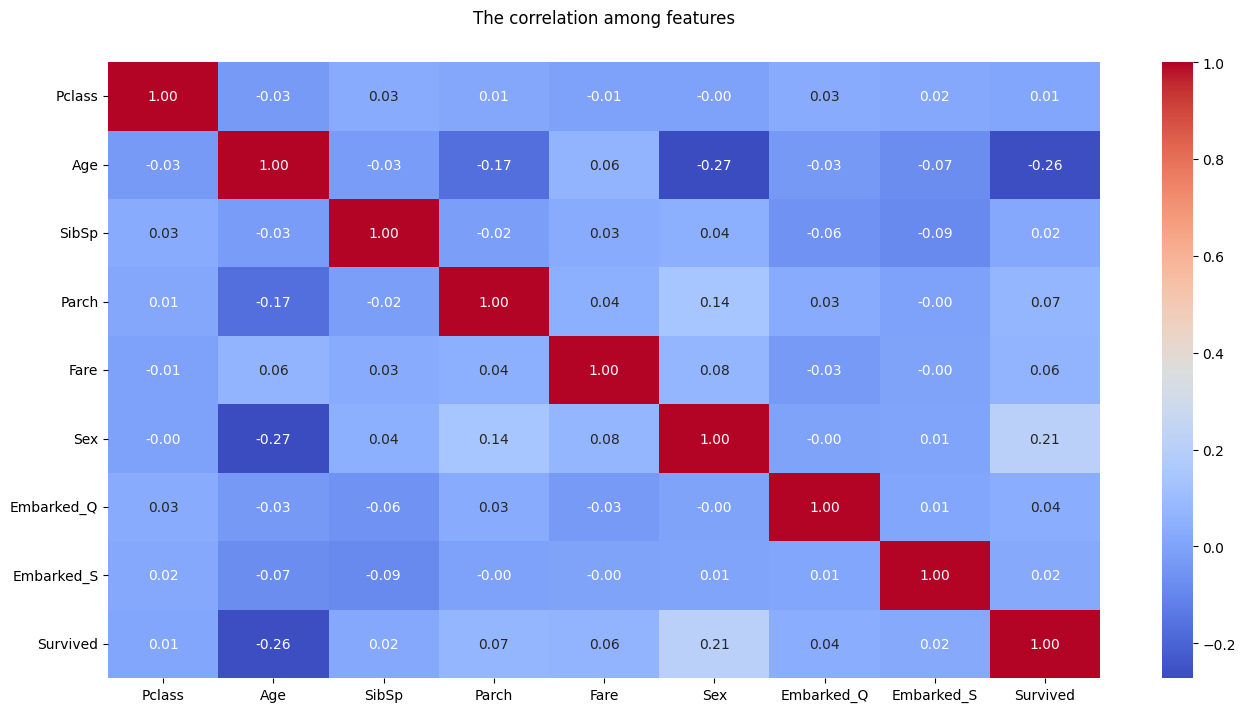

In [19]:
df = pd.read_csv('Fake_Datasets/king/king_fake_0_ctabplus.csv')
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()